####Improvement on 3rd code file(EVA_Assignment_4_Part3.ipynb)- 
####LR Scheduler
####increased Batch size
####decreased epochs
####Global Average Pooling
####Changed architecture
####Observation-Model validation accuracy  increased to 99.48%
####This architecture got 99.48% accuracy and with just 7,214 K parameters

<a href="https://colab.research.google.com/github.com/hardayal/EVA/blob/master/Session_4/EVA_Assignment_4_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
# Importing Keras library
import keras

Using TensorFlow backend.


In [0]:
# Import numpy which is fundamental package for scientific computing in python
import numpy as np
# Using sequential model from models available in keras
from keras.models import Sequential
# Importing keras layers
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam, SGD
# Importing utilities which transform data
from keras.utils import np_utils
# Importing mnist from dataset for image processing
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
# Loading train and test data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


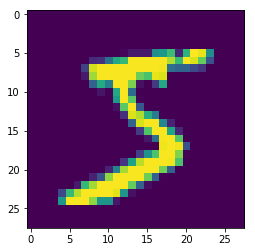

In [4]:
# Printing train data shape
print (X_train.shape)
# Matplotlib is used for ploting graph
from matplotlib import pyplot as plt
# Ploting image under code cell
%matplotlib inline
# Ploted image of train[0] from train data set
plt.imshow(X_train[0])

In [0]:
# Reshaping for train and test data for processing
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Conversion of train and test data set
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# output of train data array and its data type
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Output of train data set array of dimension 10
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
# Using Activation function from keras layers
from keras.layers import Activation, BatchNormalization
# Defining sequential model
model = Sequential()
# Using convolution and Max Pooling operation on input image

model.add(Conv2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(10, 1, 1))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
# Print Model summary 
model.summary()


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 10)        910       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


In [0]:
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# fit model for training data
model.fit(X_train, Y_train, batch_size=64, epochs=20, validation_data =(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)], verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 11s 187us/step - loss: 0.0526 - acc: 0.9831 - val_loss: 0.0341 - val_acc: 0.9896
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 186us/step - loss: 0.0424 - acc: 0.9864 - val_loss: 0.0273 - val_acc: 0.9916
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 11s 187us/step - loss: 0.0391 - acc: 0.9872 - val_loss: 0.0238 - val_acc: 0.9926
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 11s 186us/step - loss: 0.0367 - acc: 0.9882 - val_loss: 0.0276 - val_acc: 0.9917
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [14]:
# evaluating and printing model score
score = model.evaluate(X_test, Y_test, verbose=0)
print('Loss:', score[0])
print('Accuracy:', score[1])


Loss: 0.016858184567664285
Accuracy: 0.9948
